# **Primer Actividad**
Andrea Mirelle Peralta Ogaz

In [30]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Cargando el dataset
Data_3= '/Users/andrea.peralta/github-classroom/IA-Center-Python/ds-python-v5-exercises-MirellePeralta/Challenges/Data_3/airbnb.csv'

In [32]:
data = pd.read_csv(Data_3, index_col=0)
data.head() #Análisis inicial de los datos

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [33]:
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(10019, 16)


##### **Data Types**

In [34]:
print(data.info()) 
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: float6

##### **Statistic Summary**

In [35]:
data.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339


##### **Missing Data**

In [36]:
data.isna().sum() #Búsqueda de los valores faltantes entre las observaciones 

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

Dentro de room_types el que más aparece es la casa completa y el apartamento, por otro lado la que menos aparece es el cuarto privado

### **Cleaning Data**

In [37]:
data['coordinates']=data['coordinates'].str.strip('( )') #Remover paréntesis

data[['latitud', 'longitud']] = data['coordinates'].str.split(',', expand=True) #Separación de latitud y longitud en dos columnas distintas


#Converción en valores flotantes por la naturaleza de los datos
data[['latitud','longitud']] = data[['latitud','longitud']].astype('float')
data.drop(columns='coordinates',inplace=True)

In [38]:
data['price']=data['price'].str.strip('$') #Quitar '$' de la columna price
data['price']=data['price'].astype('float') #Converción a valor flotante 
data['price'].mean() #Cálculo de la media

150.90512217564665

Como se pude notar la media esta dentro de los 150

In [39]:
data['listing_added']= pd.to_datetime(data['listing_added'],
                                        infer_datetime_format=True,
                                        errors='coerce')

/var/folders/69/jwsf57w1749ds3vdzqhr26xm0000gn/T/ipykernel_80803/2292043494.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['listing_added']= pd.to_datetime(data['listing_added'],


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10019 entries, 0 to 10018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   listing_id          10019 non-null  int64         
 1   name                10014 non-null  object        
 2   host_id             10019 non-null  int64         
 3   host_name           10017 non-null  object        
 4   neighbourhood_full  10019 non-null  object        
 5   room_type           10019 non-null  object        
 6   price               9781 non-null   float64       
 7   number_of_reviews   10019 non-null  int64         
 8   last_review         7944 non-null   object        
 9   reviews_per_month   7944 non-null   float64       
 10  availability_365    10019 non-null  int64         
 11  rating              7944 non-null   float64       
 12  number_of_stays     7944 non-null   float64       
 13  5_stars             7944 non-null   float64       


Ahora podemo apreciar  los cambios hechos, aun así en ciertas columnas puede cambiarse el Dtype a algo distinto al objeto.

### **Consistency**

In [41]:
#Cálculo los calores únicos de room_type
unique_room_types = data['room_type'].unique()
print(unique_room_types)
#Cálculo de la cantidad de diferentes tipos de habitaciones
data['room_type'].value_counts()

['Private room' 'Entire home/apt' 'Private' 'Shared room' 'PRIVATE ROOM'
 'home' '   Shared room      ']


room_type
Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: count, dtype: int64

In [42]:
#listing_added > last_review
inconsistent_dates = data[data['listing_added'] > data['last_review']]
print(inconsistent_dates)

     listing_id                                               name    host_id  \
4      22986519              Bedroom on the lively Lower East Side  154262349   
50     20783900     Marvelous Manhattan Marble Hill Private Suites  148960265   
60      1908852                Oversized Studio By Columbus Circle     684629   
124    28659894  Private bedroom in prime Bushwick! Near Trains!!!  216235179   
511    33619855          Modern & Spacious in trendy Crown Heights  253354074   
521    25317793       Awesome Cozy Room in The Heart of Sunnyside!  136406167   

    host_name          neighbourhood_full        room_type  price  \
4      Brooke  Manhattan, Lower East Side     Private room  160.0   
50      Randy      Manhattan, Marble Hill     Private room   93.0   
60      Alana  Manhattan, Upper West Side  Entire home/apt  189.0   
124      Nina          Brooklyn, Bushwick     Private room   55.0   
511   Yehudis     Brooklyn, Crown Heights             home  150.0   
521      Kara     

In [43]:
#room_type valores capitalizados
data['room_type'] = data['room_type'].str.capitalize()
#room_type espacios finales
data['room_type'] = data['room_type'].str.strip()
#Reemplazo de valores de cuarto compartido, cuarto privado, cuarto de horal y espacio entero, solo si aplica
data['room_type'] = data['room_type'].replace({
    'Shared': 'Shared room',
    'Entire home/apt': 'Entire place',
    'Private room ': 'Private room',  # Remoción de espacio extra
    'Hotel room': 'Hotel room'
})

In [44]:
#Divición de la columna de neighbourhood_full en dos y limpieza
data[['borough', 'neighbourhood']] = data['neighbourhood_full'].str.split(',', expand=True)
data['borough'] = data['borough'].str.strip()
data['neighbourhood'] = data['neighbourhood'].str.strip()

In [45]:
#Drop a neighbourhood_full
data.drop(columns='neighbourhood_full', inplace=True)
#Cálculo los calores únicos de borough y neighbourhood
unique_boroughs = data['borough'].unique()
unique_neighbourhoods = data['neighbourhood'].unique()
print("Unique Boroughs:", unique_boroughs)
print("Unique Neighbourhoods:", unique_neighbourhoods)

Unique Boroughs: ['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']
Unique Neighbourhoods: ['Flatlands' 'Upper West Side' 'Brooklyn Heights' 'Lower East Side'
 'Greenwich Village' 'Harlem' 'Sheepshead Bay' 'Theater District'
 'Bushwick' 'Laurelton' 'Mott Haven' 'Flushing' 'Crown Heights' 'Midtown'
 'Financial District' 'East Village' 'Park Slope' 'Washington Heights'
 'Williamsburg' 'Chelsea' 'Bedford-Stuyvesant' 'Gowanus' 'Upper East Side'
 'Ditmars Steinway' 'Cypress Hills' "Hell's Kitchen" 'Ridgewood'
 'Marble Hill' 'Kips Bay' 'Prospect Heights' 'East New York' 'Concord'
 'Stapleton' 'Astoria' 'East Harlem' 'Sunnyside' 'Gramercy'
 'Prospect-Lefferts Gardens' 'Sunset Park' 'Forest Hills'
 'Windsor Terrace' 'Clinton Hill' 'Murray Hill' 'Flatiron District'
 'Greenpoint' 'East Flatbush' 'Tribeca' 'Woodhaven' 'Fort Greene' 'Inwood'
 'Chinatown' 'Rockaway Beach' 'Woodside' 'Bayside' 'Bensonhurst' 'SoHo'
 'Red Hook' 'West Village' 'South Slope' 'Richmond Hill' 'Jamaica'
 'Boerum Hil

In [46]:
#Espacios en blanco de neighbourhood
data['neighbourhood'] = data['neighbourhood'].str.strip()
#Establecer el máximo para la columna de rating
data['rating'] = data['rating'].clip(0, 5)
#Los que sobrepasen este límite se les aplica drop
rating_out_of_range = data[data['rating'] > 5.0]
data.drop(rating_out_of_range.index, inplace=True)

##### **Histograma**

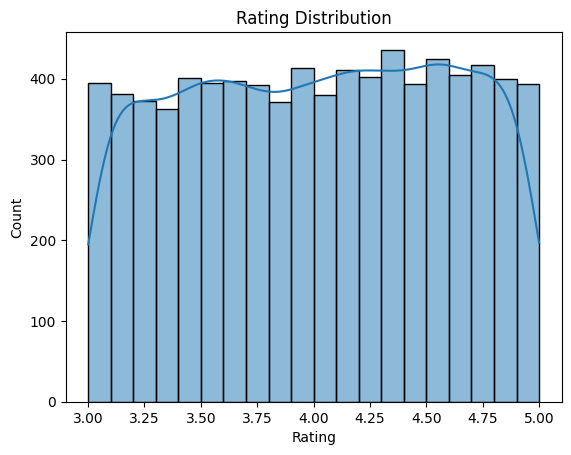

In [47]:
#Vemos el histograma de la columna rating
sns.histplot(data['rating'], bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

In [48]:
#Obtención del máximo valor de rating
print("Maximum Rating:", data['rating'].max())

Maximum Rating: 5.0


### **Datos Duplicados**

In [49]:
#Find duplicates
duplicates = data[data.duplicated(keep=False)]

In [52]:
#Remove identical duplicates
data.drop_duplicates(inplace=True)

In [55]:
#Show all duplicates
print("Identical Duplicates:")
print(duplicates)

Identical Duplicates:
      listing_id                                               name  \
368     17861841                             THE CREATIVE COZY ROOM   
1145      253806                   Loft Suite @ The Box House Hotel   
1338    32610834                            Manhattan by the water!   
1658    35646737                Private Cabins @ Chelsea, Manhattan   
2118    33346762              2BR Apartment in Brownstone Brooklyn!   
3007    17861841                             THE CREATIVE COZY ROOM   
3065    16518377        East Village 1BR Apt with all the amenities   
3340    35646737                Private Cabins @ Chelsea, Manhattan   
5025    33831116  Sonder | Stock Exchange | Collected 1BR + Laundry   
5077    33831116  Sonder | Stock Exchange | Collected 1BR + Laundry   
5236    29844951                                Cozy Home In Queens   
5246    22014840       Sunny Bedroom Only 1 Metro Stop to Manhattan   
5251    19477677                    Huge sunny room nex

In [56]:
# Búsqueda de duplicados no idénticos
non_identical_duplicates = data[data.duplicated(keep=False) & ~data.duplicated(keep='first')]

# Impreción de los duplicados no idénticos
print("Non-Identical Duplicates:")
print(non_identical_duplicates)


Non-Identical Duplicates:
Empty DataFrame
Columns: [listing_id, name, host_id, host_name, room_type, price, number_of_reviews, last_review, reviews_per_month, availability_365, rating, number_of_stays, 5_stars, listing_added, latitud, longitud, borough, neighbourhood]
Index: []


En este estudio, se aplicaron técnicas de limpieza de datos con el propósito de asegurar que el conjunto de datos contenga las propiedades necesarias para un análisis preciso y confiable. 

Este proceso de limpieza y estandarización ha preparado el conjunto de datos de Airbnb en Nueva York para análisis y modelado posteriores, permitiendo trabajar con información más precisa. 

Esto es crucial para extraer insights significativos y tomar decisiones fundamentadas en futuros proyectos de investigación y análisis de mercado. La calidad de los datos es esencial para obtener resultados precisos y confiables en cualquier análisis de datos.